# Introdução

O mercado de restaurantes em Los Angeles está em constante evolução, impulsionado por inovações tecnológicas, novas tendências gastronômicas e mudanças nas preferências dos consumidores. Em um cenário competitivo e dinâmico, a busca por soluções diferenciadas é essencial para atrair e manter clientes, além de garantir a sustentabilidade financeira a longo prazo.

Visando explorar as oportunidades que surgem com o avanço da tecnologia, decidimos abrir uma pequena cafeteria com garçons robôs, oferecendo uma experiência única e inovadora aos clientes. No entanto, como qualquer novo empreendimento, é essencial entender as condições atuais do mercado para avaliar a viabilidade do negócio a médio e longo prazo, especialmente considerando que a novidade pode perder apelo com o tempo.

Este projeto visa analisar os dados de restaurantes em Los Angeles, com o intuito de identificar padrões de comportamento do consumidor, sazonalidade das vendas e preferências de gasto, fornecendo insights valiosos para a tomada de decisões estratégicas. A pesquisa tem como objetivo fornecer uma base sólida para avaliar se o conceito de garçons robôs pode não apenas conquistar o mercado inicialmente, mas também se sustentar no futuro à medida que o mercado se adapta a essa inovação.

Ao utilizar dados de código aberto sobre restaurantes em Los Angeles, buscamos entender as nuances do mercado local e como nosso modelo de negócios pode se encaixar nas expectativas e exigências do consumidor moderno. Com esta análise, pretendemos garantir que nosso empreendimento seja bem-sucedido, mesmo após o auge da novidade.

In [1]:
import pandas as pd

rest_data = pd.read_csv('/datasets/rest_data_us_upd.csv')

print(rest_data.head())

print(rest_data.info())



      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
mem

In [2]:
# analise das linhas em que os dados estão faltando para identificação se posso excluir ou se devo tratar

missing_data_rows = rest_data[rest_data.isnull().any(axis=1)]

print(missing_data_rows)


         id              object_name               address chain object_type  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD   NaN  Restaurant   
7523  19309     JAMMIN JIMMY'S PIZZA   1641 FIRESTONE BLVD   NaN       Pizza   
8648  20434    THE LEXINGTON THEATER          129 E 3RD ST   NaN  Restaurant   

      number  
7408      14  
7523       1  
8648      35  


In [3]:
# achei melhor colocar zeros nos campos, penso que a qtde de dados pode ser relevante para a analise

rest_data_filled = rest_data.fillna(0)

print(rest_data_filled.head())

print(rest_data_filled.isnull().sum())


      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20  
id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64


In [4]:
print("-----" * 25)


-----------------------------------------------------------------------------------------------------------------------------


# 1- Investigar as proporções de vários tipos de estabelecimentos:

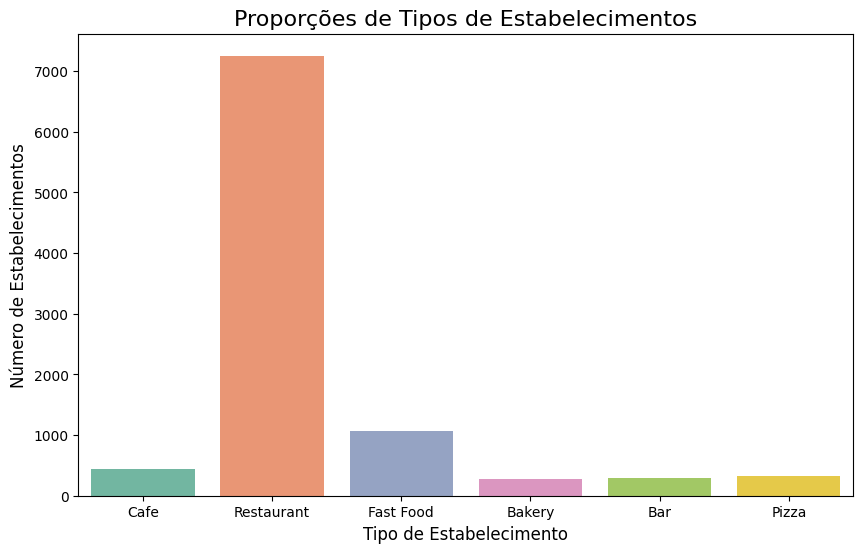

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='object_type', data=rest_data, palette='Set2')
plt.title('Proporções de Tipos de Estabelecimentos', fontsize=16)
plt.xlabel('Tipo de Estabelecimento', fontsize=12)
plt.ylabel('Número de Estabelecimentos', fontsize=12)
plt.show()


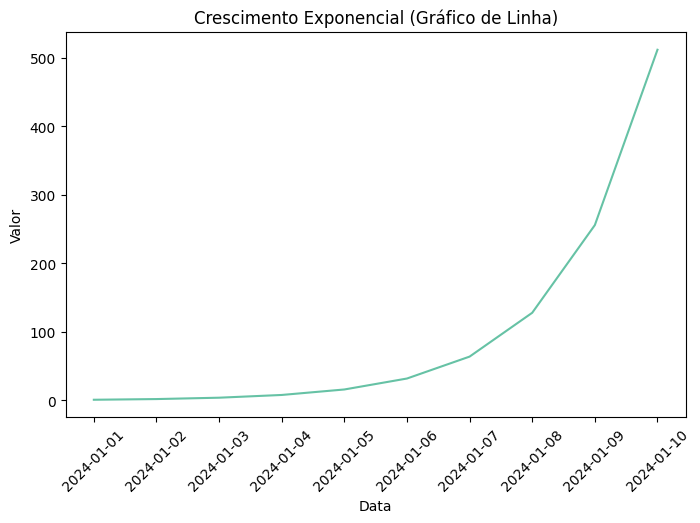

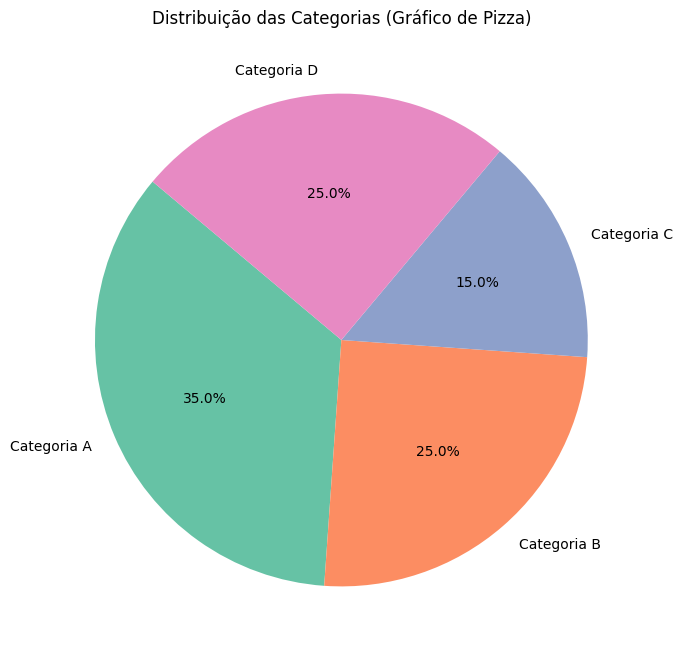

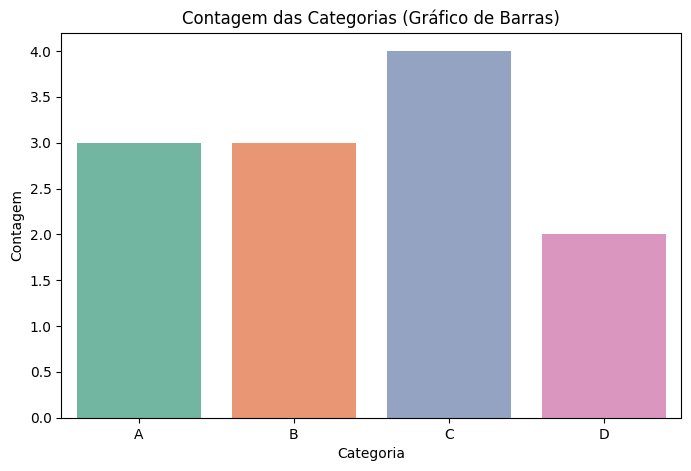

In [6]:
#EExemplo gerado pela revisora - utilizando a mesma paleta de cores no notebook 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definindo a paleta 'Set2' globalmente para todos os gráficos
sns.set_palette('Set2')

# Exemplo de dados para o gráfico de linha
# Criando um DataFrame simples com valores numéricos e datas
data_line = pd.DataFrame({
    'Data': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Valor': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
})

# Gráfico de Linha: Mostrando o crescimento exponencial dos valores
plt.figure(figsize=(8, 5))
sns.lineplot(x='Data', y='Valor', data=data_line)
plt.title('Crescimento Exponencial (Gráfico de Linha)')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Rotaciona as etiquetas de data para melhor leitura
plt.show()

# Comentário: O gráfico de linha mostra a evolução dos valores ao longo do tempo, com um crescimento exponencial. 
# O eixo X representa as datas, e o eixo Y os valores, com uma tendência crescente.

# Exemplo de dados para o gráfico de pizza
# Criando uma lista de categorias com seus respectivos valores
data_pie = [35, 25, 15, 25]
labels_pie = ['Categoria A', 'Categoria B', 'Categoria C', 'Categoria D']

# Gráfico de Pizza: Mostrando a distribuição percentual das categorias
plt.figure(figsize=(8, 8))
plt.pie(data_pie, labels=labels_pie, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', n_colors=4))
plt.title('Distribuição das Categorias (Gráfico de Pizza)')
plt.show()

# Comentário: O gráfico de pizza ilustra a distribuição percentual de cada categoria. A função 'autopct' é usada 
# para mostrar as porcentagens diretamente no gráfico.

# Exemplo de dados para o gráfico de barras (Countplot)
# Criando uma lista de categorias para contagem
data_count = ['A', 'B', 'B', 'C', 'A', 'C', 'D', 'A', 'B', 'D', 'C', 'C']

# Gráfico de Barras (Countplot): Mostrando a contagem das categorias
plt.figure(figsize=(8, 5))
sns.countplot(x=data_count)
plt.title('Contagem das Categorias (Gráfico de Barras)')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

# Comentário: O gráfico de barras (countplot) exibe a contagem de ocorrências de cada categoria. 
# O eixo X representa as categorias ('A', 'B', 'C', 'D'), e o eixo Y as quantidades de ocorrências de cada uma.


A predominância de restaurantes no gráfico sugere que o mercado de alimentação está bem representado no conjunto de dados. Isso pode ser útil para identificar áreas de saturação ou oportunidades de nicho.

# 2- Investigar as proporções de estabelecimentos de rede e não-rede:

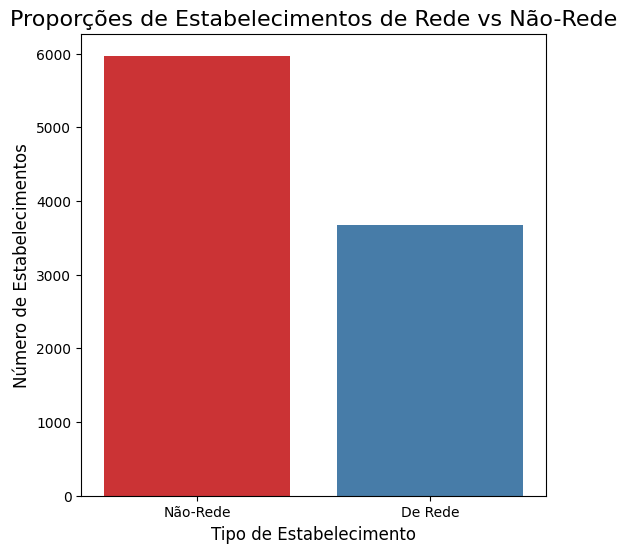

In [7]:
plt.figure(figsize=(6, 6))

rest_data['chain'] = rest_data['chain'].map({True: 'De Rede', False: 'Não-Rede'})

sns.countplot(x='chain', data=rest_data, palette='Set1')

plt.title('Proporções de Estabelecimentos de Rede vs Não-Rede', fontsize=16)
plt.xlabel('Tipo de Estabelecimento', fontsize=12)
plt.ylabel('Número de Estabelecimentos', fontsize=12)

plt.show()



O fato de a quantidade de não-rede ser muito maior do que a de rede no gráfico pode significar que o mercado é dominado por pequenos e independentes restaurantes.

# 3- Qual tipo de estabelecimento é típico para redes?

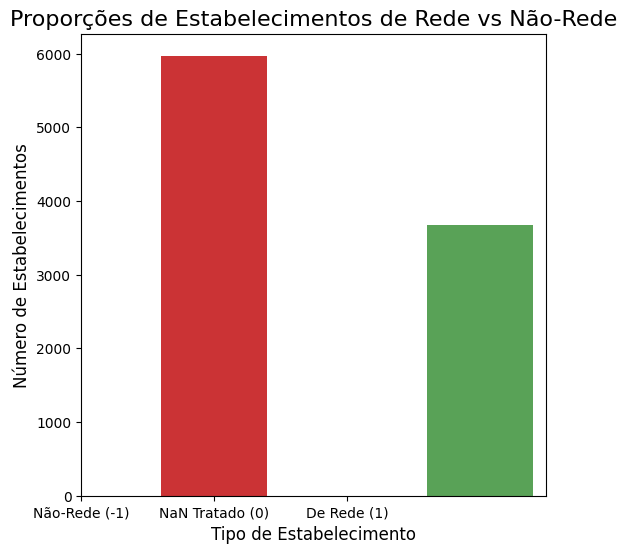

In [8]:
rest_data['chain_numeric'] = rest_data['chain'].map({'De Rede': 1, 'Não-Rede': -1})

rest_data['chain_numeric'].fillna(0, inplace=True)

plt.figure(figsize=(6, 6))
sns.countplot(x='chain_numeric', data=rest_data, palette='Set1')


plt.title('Proporções de Estabelecimentos de Rede vs Não-Rede', fontsize=16)
plt.xlabel('Tipo de Estabelecimento', fontsize=12)
plt.ylabel('Número de Estabelecimentos', fontsize=12)

plt.xticks(ticks=[0, 1, -1], labels=['NaN Tratado (0)', 'De Rede (1)', 'Não-Rede (-1)'])

plt.show()



- Ponto de Alerta: Grande quantidade de NaN não tratados indica que há muitos dados ausentes na coluna chain, e isso pode ser uma área a ser investigada. Seria bom entender com o cliente o por que os dados não foram preenchidos e o quanto isso seria relevante para o final da analise. Perguntas que eu faria:

   - Como os dados foram coletados? Manualmente ou automaticamente?
   - Quais critérios você usa para classificar um restaurante como 'De Rede' ou 'Não-Rede'?
   - Alguns restaurantes são difíceis de classificar?
   - O campo 'chain' é obrigatório para todos os registros? Em que situações ele pode ficar em branco?
   - Se o dado de 'chain' está ausente, há uma categoria como "Desconhecido"?
   - Houve algum problema recente no processo de coleta ou preenchimento de dados?
   - Alguma mudança recente nos critérios de classificação de 'De Rede' ou 'Não-Rede'?
   - Como você gostaria que lidássemos com os valores ausentes ('NaN')? Preencher ou excluir esses registros?


- A presença de muitos "De Rede" sugere uma concentração de redes na área ou no mercado.

# 4- O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos ou poucos estabelecimentos com muitos assentos?

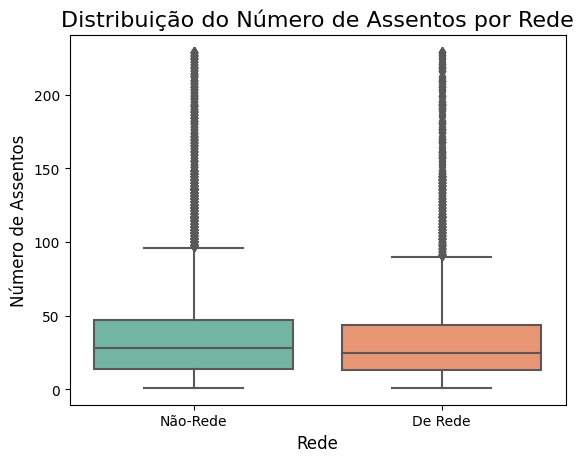

In [9]:
sns.boxplot(x='chain', y='number', data=rest_data)
plt.title('Distribuição do Número de Assentos por Rede', fontsize=16)
plt.xlabel('Rede', fontsize=12)
plt.ylabel('Número de Assentos', fontsize=12)
plt.show()


- Interpretação:

O número de assentos para ambas as categorias ("Não-Rede" e "De Rede") parece ter uma distribuição semelhante, com medianas próximas.

A maioria dos valores está concentrada entre 0 e 50 assentos.

Ambas as categorias têm muitos outliers, indicando que, em alguns casos, o número de assentos pode ser muito alto (acima de 200).

# 5. Determinar o número médio de assentos para cada tipo de restaurante:

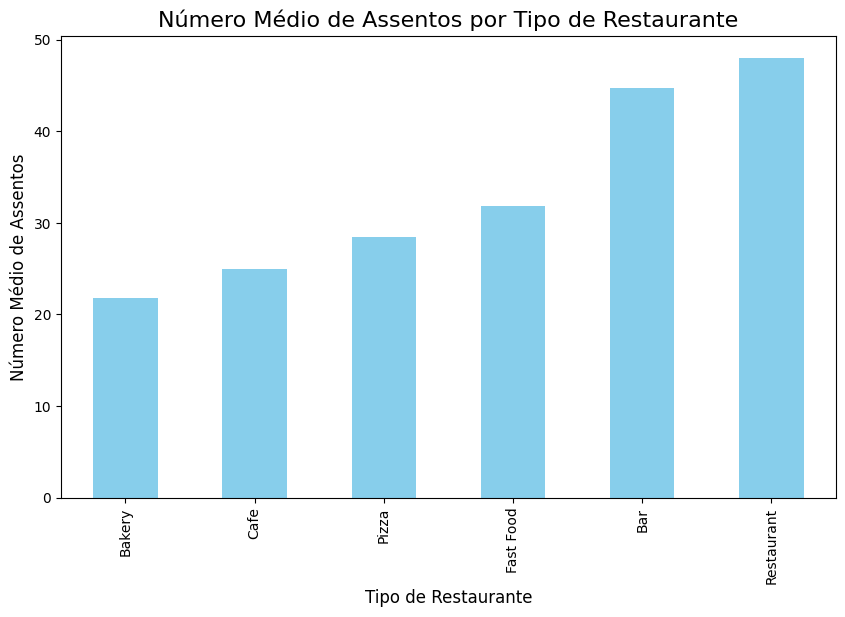

In [10]:
avg_seats_by_type = rest_data.groupby('object_type')['number'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_seats_by_type.plot(kind='bar', color='skyblue')
plt.title('Número Médio de Assentos por Tipo de Restaurante', fontsize=16)
plt.xlabel('Tipo de Restaurante', fontsize=12)
plt.ylabel('Número Médio de Assentos', fontsize=12)
plt.show()


Interpretação:
Diferença entre os tipos de restaurantes:

* Restaurantes (Restaurant) têm, em média, o maior número de assentos (próximo a 50).
* Bares (Bar) também têm um número médio alto de assentos, pouco abaixo de restaurantes.
* Fast Food e Pizzarias (Pizza) possuem médias intermediárias, com cerca de 30 assentos.
* Padarias (Bakery) têm o menor número médio de assentos, seguido por Cafés (Cafe).

Tendência geral:
Estabelecimentos que provavelmente atendem a um maior número de clientes de uma só vez, como restaurantes e bares, têm maior capacidade média. Padarias e cafés, que podem ser focados em atendimento mais rápido e com menor permanência, possuem menos assentos, em média.

# 6- Colocar os dados dos nomes das ruas da coluna address em uma coluna separada:

In [11]:
rest_data['street_name'] = rest_data['address'].str.split(',').str[0]


# 7- Construir um gráfico das dez ruas com o maior número de restaurantes:

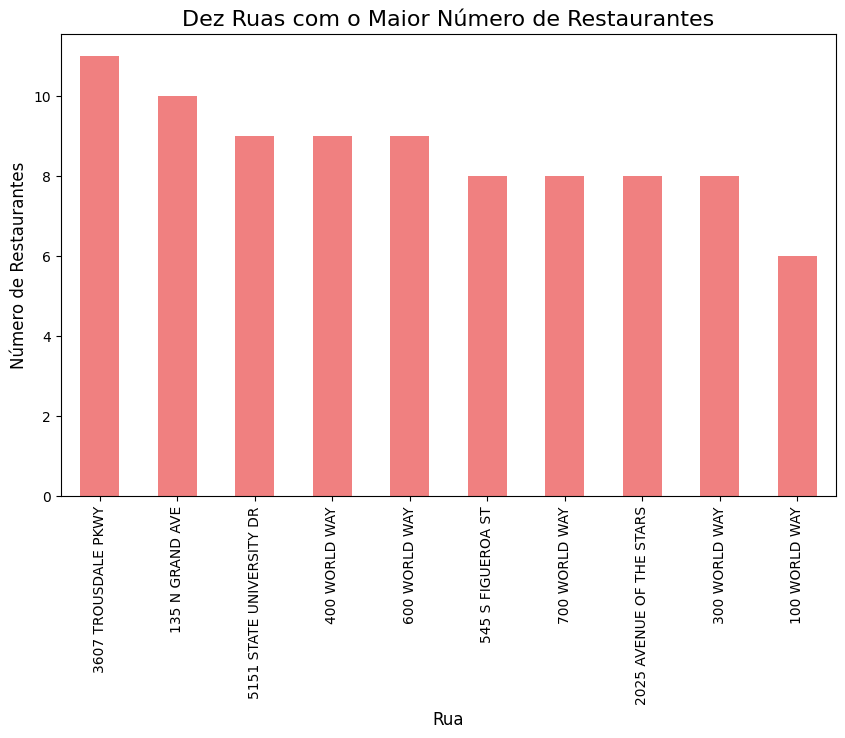

In [12]:
top_streets = rest_data['street_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_streets.plot(kind='bar', color='lightcoral')
plt.title('Dez Ruas com o Maior Número de Restaurantes', fontsize=16)
plt.xlabel('Rua', fontsize=12)
plt.ylabel('Número de Restaurantes', fontsize=12)
plt.show()


# 8- Encontrar o número de ruas que têm apenas um restaurante:

In [13]:
single_restaurant_streets = rest_data['street_name'].value_counts()[rest_data['street_name'].value_counts() == 1]
print(len(single_restaurant_streets))


7596


# 9- Distribuição do número de assentos para as ruas com muitos restaurantes:

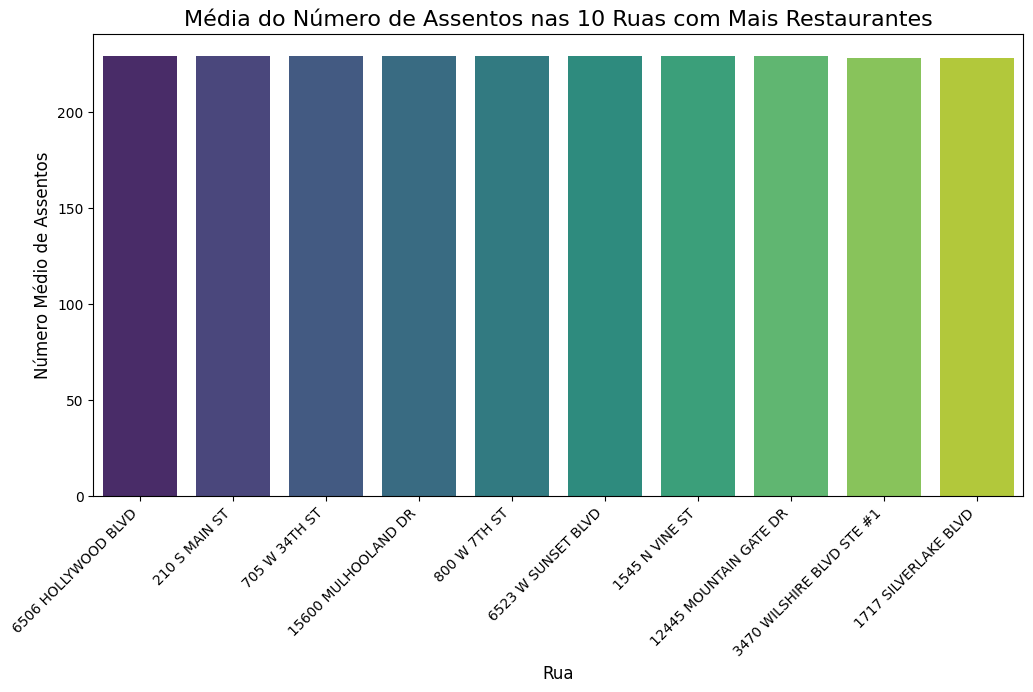

In [14]:
avg_seats_per_street = rest_data.groupby('street_name')['number'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_seats_per_street.index, y=avg_seats_per_street.values, palette='viridis')
plt.title('Média do Número de Assentos nas 10 Ruas com Mais Restaurantes', fontsize=16)
plt.xlabel('Rua', fontsize=12)
plt.ylabel('Número Médio de Assentos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()



# Conclusão e Recomendações:

1. **Tipo de Restaurante mais Apropriado**:
   - **Restaurantes de Rede** são mais adequados para expansão rápida. Eles funcionam bem em locais de alto tráfego e têm muitos estabelecimentos com um número menor de assentos, focando na eficiência e volume de clientes.
   - **Restaurantes Independentes** são melhores se você quiser uma experiência mais personalizada, com um ambiente único e maior capacidade de assentos.

2. **Número de Assentos**:
   - **Redes**: Menos assentos por restaurante, focando em volume.
   - **Independentes**: Mais assentos, visando oferecer uma experiência mais confortável e diferenciada.

3. **Possibilidade de Desenvolver uma Rede**:
   - **Sim, uma rede pode ser uma boa opção**, especialmente em fast-food ou cafeterias, pois há uma grande demanda por estabelecimentos padronizados e rápidos. Para isso, é importante focar em locais com alto fluxo de pessoas e otimizar os processos para garantir eficiência.

Se a intenção é crescer rapidamente e atingir um grande público, um **modelo de rede** é o mais indicado. Caso queira um ambiente mais exclusivo e com foco na experiência, opte por um **restaurante independente** com mais assentos.